<a href="https://colab.research.google.com/github/BillWorstell/derenzo_phantom/blob/master/iCheckSinograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Open In Colab

https://vivekg.dev/DiffDRR/

install DiffDRR from PyPI:

In [1]:
!pip install diffdrr

#Set up DiffDRR environment

In [2]:
import os
import sys
import torch
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith("2.1.") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'



Install icecream for debug printing

https://github.com/gruns/icecream

In [3]:
!pip install icecream
from icecream import ic

From https://github.com/rossbar/derenzo_phantom

From derenzo_log.py

In [4]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpp

https://vivekg.dev/DiffDRR/

Usage

The following minimal example specifies the geometry of the projectional radiograph imaging system and traces rays through a CT volume:

#Install DiffDRR

Use the version of DiffDRR posted on github

In [5]:
!pip install 'git+https://github.com/BillWorstell/DiffDRR.git'

  Cloning https://github.com/BillWorstell/DiffDRR.git to /tmp/pip-req-build-czgzszcu
  Running command git clone --filter=blob:none --quiet https://github.com/BillWorstell/DiffDRR.git /tmp/pip-req-build-czgzszcu
  Resolved https://github.com/BillWorstell/DiffDRR.git to commit 4e415ec1305a0ccf067cddf4bec24246807ec87b
  Preparing metadata (setup.py) ... done


In [6]:
import torch

from diffdrr.data import load_example_ct
from diffdrr.drr import DRR
from diffdrr.visualization import plot_drr

Git clone from github publib open source code to colab working directory

See https://stackoverflow.com/questions/50850216/google-colab-install-from-github-glrm

Read in the volume and get the isocenter

In [7]:
volume, spacing = load_example_ct()
bx, by, bz = torch.tensor(volume.shape) * torch.tensor(spacing) / 2
ic(bx, by, bz)
ic(volume.shape)
ic(spacing)

ic| bx: tensor(180.), by: tensor(180.), bz: tensor(166.2500)
ic| volume.shape: (512, 512, 133)
ic| spacing: [0.703125, 0.703125, 2.5]


[0.703125, 0.703125, 2.5]

Sum volume over orthogonal projections

SumX = Volumes summed over X (YZ projection

SumY = Volumes summed over Y (YZ projection)

SumZ = Volumes summed over Z (YZ projection))

In [8]:
ic(volume.shape)
SumX=volume.sum(0)
SumY=volume.sum(1)
SumZ=volume.sum(2)
ic(SumX.shape)
ic(SumY.shape)
ic(SumZ.shape)

ic| volume.shape: (512, 512, 133)
ic| SumX.shape: (512, 133)
ic| SumY.shape: (512, 133)
ic| SumZ.shape: (512, 512)


(512, 512)

#Get derenzo_phantom version from github

In [9]:
!rm /content/derenzo_phantom -rf
!git clone https://github.com/Billworstell/derenzo_phantom.git

Cloning into 'derenzo_phantom'...
remote: Enumerating objects: 151, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 151 (delta 42), reused 0 (delta 0), pack-reused 70
Receiving objects: 100% (151/151), 7.84 MiB | 10.53 MiB/s, done.
Resolving deltas: 100% (75/75), done.


look around

In [10]:
!pwd
!ls -ltr

# importing module
import sys

# printing all directories for
# interpreter to search
sys.path.append('/content/derenzo_phantom/')

!ls -ltr /content
!ls -ltr /content/derenzo_phantom/
!ls -ltr /content/derenzo_phantom/derenzo_log.py

/content
total 12
drwxr-xr-x 1 root root 4096 Jan 17 20:46 sample_data
drwx------ 5 root root 4096 Jan 18 18:04 drive
drwxr-xr-x 3 root root 4096 Jan 18 19:53 derenzo_phantom
total 12
drwxr-xr-x 1 root root 4096 Jan 17 20:46 sample_data
drwx------ 5 root root 4096 Jan 18 18:04 drive
drwxr-xr-x 3 root root 4096 Jan 18 19:53 derenzo_phantom
total 8204
-rw-r--r-- 1 root root     303 Jan 18 19:53  README.md
-rw-r--r-- 1 root root    4270 Jan 18 19:53  derenzo_log.py
-rw-r--r-- 1 root root 1545339 Jan 18 19:53 'DeRenzo iCheckRotations ipynb.pdf'
-rw-r--r-- 1 root root 1296108 Jan 18 19:53  iCheckDRRs.ipynb
-rw-r--r-- 1 root root 2680111 Jan 18 19:53  iCheckRotations.ipynb
-rw-r--r-- 1 root root 1075983 Jan 18 19:53  iPytorchPhantom.ipynb
-rw-r--r-- 1 root root  888138 Jan 18 19:53  iphantom1.ipynb
-rw-r--r-- 1 root root  429523 Jan 18 19:53  iphantom2.ipynb
-rw-r--r-- 1 root root   31195 Jan 18 19:53  phantom.py
-rw-r--r-- 1 root root  429910 Jan 18 19:53  iphantom3.ipynb
-rw-r--r-- 1 root 

import DerenzoPhantom

In [11]:
from phantom import DerenzoPhantom

Use reference phantom, but offset along X axis

/content/derenzo_phantom/phantom.py:726: UserWarning: Cannot fit multiple features in section with feature size = 10.0
  warnings.warn(("Cannot fit multiple features in section with "
/content/derenzo_phantom/phantom.py:726: UserWarning: Cannot fit multiple features in section with feature size = 15.0
  warnings.warn(("Cannot fit multiple features in section with "
ic| SectorMask.sum(): 12830.0
ic| self.mask.sum(): 12830.0
ic| SectorMask.sum(): 0.0
ic| self.mask.sum(): 12830.0
ic| SectorMask.sum(): 0.0
ic| self.mask.sum(): 12830.0
ic| SectorMask.sum(): 0.0
ic| self.mask.sum(): 12830.0
ic| SectorMask.sum(): 0.0
ic| self.mask.sum(): 12830.0
ic| SectorMask.sum(): 0.0
ic| self.mask.sum(): 12830.0


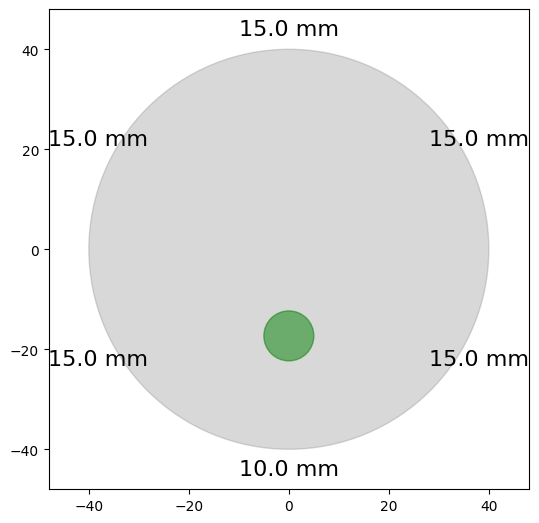

In [12]:
radius = 40.0
#well_seps = (8.0, 6.0, 5.0, 4.0, 3.0, 2.0)
well_seps = (10.,15.,15.,15.,15.,15.)
test_phantom = DerenzoPhantom(radius, well_seps, )
test_phantom.show()

Generate Mask for reference phantom

ic| myMask.shape: (1024, 1024)
ic| myMask.sum(): 12830.0


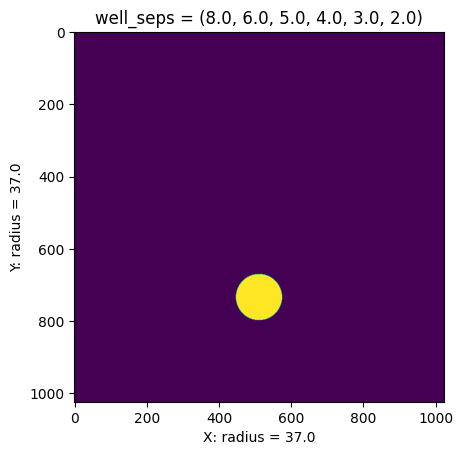

In [13]:
myMask=test_phantom.mask.reshape(1024,1024)
ic(myMask.shape)
ic(myMask.sum())
#plt.imshow(myMask)
plt.imshow(np.flipud(myMask))

plt.title('well_seps = (8.0, 6.0, 5.0, 4.0, 3.0, 2.0)')
plt.xlabel('X: radius = 37.0')
plt.ylabel('Y: radius = 37.0')
plt.show()

make meshgrid from volume and spacing

In [14]:
#volume, spacing = load_example_ct()
bx, by, bz = torch.tensor(volume.shape) * torch.tensor(spacing) / 2
ic(bx, by, bz)
ic(volume.shape)
ic(spacing)

ic| bx: tensor(180.), by: tensor(180.), bz: tensor(166.2500)
ic| volume.shape: (512, 512, 133)
ic| spacing: [0.703125, 0.703125, 2.5]


[0.703125, 0.703125, 2.5]

Get lab frame coordinates for voxels in volume

In [15]:
    xlinspace=np.linspace(-256*spacing[0], 256*spacing[0], 512)
    ylinspace=np.linspace(-256*spacing[1], 256*spacing[1], 512)
    zlinspace=np.linspace(-66.5*spacing[2], 66.5*spacing[2], 133)
    xgrid,ygrid,zgrid = np.meshgrid(xlinspace, ylinspace,zlinspace)
    xgrid=xgrid.flatten()
    ygrid=ygrid.flatten()
    zgrid=zgrid.flatten()


Define rotateImage for psi rotation of phantom, using scipy ndimage

In [16]:
from scipy import ndimage

def rotateImage(img, angle, pivot):
    padX = [img.shape[1] - pivot[0], pivot[0]]
    padY = [img.shape[0] - pivot[1], pivot[1]]
    imgP = np.pad(img, [padY, padX], 'constant')
    imgR = ndimage.rotate(imgP, angle, reshape=False)
    return imgR[padY[0] : -padY[1], padX[0] : -padX[1]]


Define 3D rotation matrices


In [17]:
# import math for rotation Matrix multiplication
import math as m

def Rx(theta):
  return np.matrix([[ 1, 0           , 0           ],
                   [ 0, m.cos(theta),-m.sin(theta)],
                   [ 0, m.sin(theta), m.cos(theta)]])

def Ry(theta):
  return np.matrix([[ m.cos(theta), 0, m.sin(theta)],
                   [ 0           , 1, 0           ],
                   [-m.sin(theta), 0, m.cos(theta)]])

def Rz(theta):
  return np.matrix([[ m.cos(theta), -m.sin(theta), 0 ],
                   [ m.sin(theta), m.cos(theta) , 0 ],
                   [ 0           , 0            , 1 ]])



#Specify 3D Phantom Geometry

with null Rotation=[0,0,0], Translation=[2*radius,0,0]

---



In [18]:
# NULL TRANSLATION AND NULL ROTATION
#
#Hard-wire 100mm tall phantom for the moment
PhantomHalfZ=50.
ic(PhantomHalfZ)
#TranslatePhantom=[30.,40.,50.]
TranslateX=2.*radius
TranslatePhantom=[TranslateX,0.,0.]
ic(TranslatePhantom)

# specify Euler angles for establishing Phantom orientation in lab frame
psi = 0.
#psi=np.pi/4.
#phi=np.pi/4.
phi=0.0
#theta=np.pi/6.
theta=0.0

psiDeg=psi*(180./np.pi)
thetaDeg=theta*(180./np.pi)
phiDeg=phi*(180./np.pi)

RotatePhantom=[phi,theta,psi]
ic(RotatePhantom)

spacingPhantom=[(2.*radius)/1024.,2.*radius/1024.,2.*PhantomHalfZ]
ic(spacingPhantom)

ic| PhantomHalfZ: 50.0
ic| TranslatePhantom: [80.0, 0.0, 0.0]
ic| RotatePhantom: [0.0, 0.0, 0.0]
ic| spacingPhantom: [0.078125, 0.078125, 100.0]


[0.078125, 0.078125, 100.0]

Position phantom in lab frame by first rotating by psi about initial z, then by theta about y', then by phi about z''

In [19]:
R_Invert=  Ry(-theta) * Rz(-phi)
print(np.round(R_Invert, decimals=2))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [20]:
# Transform from lab frame 'grid' to phantom reference frame through a series of transformations
#
# Invert translation from Lab System origin to Phantom System origin
ic(radius)
ic(PhantomHalfZ)
ic(TranslatePhantom)
xp1 = xgrid-TranslatePhantom[0]
yp1 = ygrid-TranslatePhantom[1]
zp1 = zgrid-TranslatePhantom[2]
ic(xp1.shape)

v1 = np.array([xp1,yp1,zp1])
v2 = R_Invert * v1

xp2=v2[0,:]
yp2=v2[1,:]
zp2=v2[2,:]

xp3=np.squeeze(np.asarray(xp2))
yp3=np.squeeze(np.asarray(yp2))
zp3=np.squeeze(np.asarray(zp2))
ic(xp1)
ic(xp2)
ic(xp3)

ic(xp1.size)
ic(xp1.shape)
ic(xp2.shape)
ic(xp3.shape)

ixPh=np.floor(((xp3+radius)/spacingPhantom[0])).astype(int)
ic(ixPh.max())
ic(ixPh.min())
iyPh=np.floor(((yp3+radius)/spacingPhantom[1])).astype(int)
ic(iyPh.max())
ic(iyPh.min())
#izPh=np.floor(((zp3+PhantomHalfZ)/spacingPhantom[2])).astype(int)
#ic(izPh.max())
#ic(izPh.min())

ic| radius: 40.0
ic| PhantomHalfZ: 50.0
ic| TranslatePhantom: [80.0, 0.0, 0.0]
ic| xp1.shape: (34865152,)
ic| xp1: array([-260., -260., -260., ...,  100.,  100.,  100.])
ic| xp2: matrix([[-260., -260., -260., ...,  100.,  100.,  100.]])
ic| xp3: array([-260., -260., -260., ...,  100.,  100.,  100.])
ic| xp1.size: 34865152
ic| xp1.shape: (34865152,)
ic| xp2.shape: (1, 34865152)
ic| xp3.shape: (34865152,)
ic| ixPh.max(): 1792
ic| ixPh.min(): -2816
ic| iyPh.max(): 2816
ic| iyPh.min(): -1792


-1792

Insert test reference phantom into source volume

In [21]:
# Input test phantom reference mask and rotate by psi
phantomMask=test_phantom.mask.reshape(1024,1024)
pivot=[511,511]
phantomMaskR=rotateImage(phantomMask, psiDeg, pivot)

volumeShape=[512, 512, 133]
phantomShape=[1024,1024]
ic(volumeShape)
volume=np.zeros(volumeShape).flatten()
ic(volume.shape)

ic(min(zp1))
ic(max(zp1))
ic(min(zp3))
ic(max(zp3))
validX=(ixPh>=0) & (ixPh<phantomShape[0])
validY=(iyPh>=0) & (iyPh<phantomShape[1])
validZ=(zp3>=-PhantomHalfZ) & (zp3<=PhantomHalfZ)
valid=(validX & validY & validZ).flatten()
ic(valid.shape)
ixPh2=ixPh[valid]
iyPh2=iyPh[valid]
Test=volume[valid]
ic(Test.shape)

volume=volume*0.
volume[valid]=phantomMaskR[ixPh2,iyPh2]

volume=volume.reshape(volumeShape)
PVCvolume=np.zeros(volume.shape,dtype=np.float32)
PVCvolume[1:511, 1:511, :] += volume[0:510, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 2:512, :] / 9.

ic| volumeShape: [512, 512, 133]
ic| volume.shape: (34865152,)
ic| min(zp1): -166.25
ic| max(zp1): 166.25
ic| min(zp3): -166.25
ic| max(zp3): 166.25
ic| valid.shape: (34865152,)
ic| Test.shape: (502398,)


Display Phantom projections within volume

ic| PVCvolume.shape: (512, 512, 133)
ic| SumX.shape: (512, 133)
ic| SumY.shape: (512, 133)
ic| SumZ.shape: (512, 512)


Text(0.5, 1.0, 'T= [80.0, 0.0, 0.0] R= [psi=0.0, theta=0.0, phi=0.0] ')

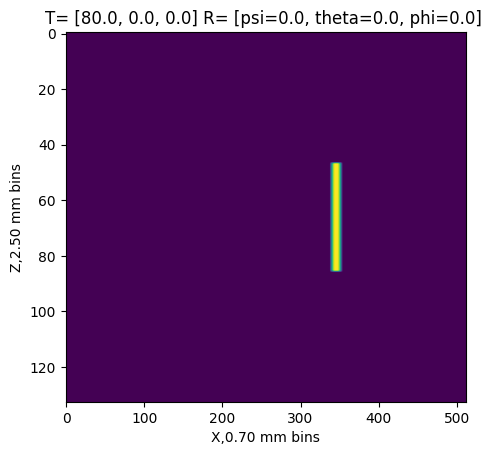

In [22]:
ic(PVCvolume.shape)
SumX=PVCvolume.sum(0)
SumY=PVCvolume.sum(1)
SumZ=PVCvolume.sum(2)
ic(SumX.shape)
ic(SumY.shape)
ic(SumZ.shape)

ThisAspect=spacing[2]/spacing[0]
plt.imshow(np.flipud(SumX.T),aspect=ThisAspect)
plt.xlabel(f'X,{spacing[0]:0.2f} mm bins')
plt.ylabel(f'Z,{spacing[2]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [psi={psiDeg:.1f}, ' + f'theta={thetaDeg:.1f}, ' + f'phi={phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

Text(0.5, 1.0, 'T= [80.0, 0.0, 0.0] R= [psi=0.0, theta=0.0, phi=0.0] ')

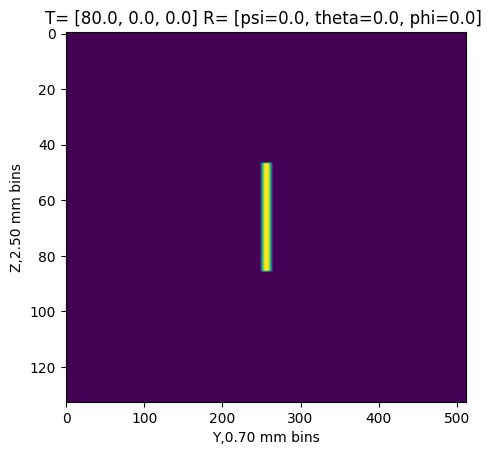

In [23]:
ThisAspect=spacing[2]/spacing[0]
plt.imshow(np.flipud(SumY.T),aspect=ThisAspect)
plt.xlabel(f'Y,{spacing[0]:0.2f} mm bins')
plt.ylabel(f'Z,{spacing[2]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [psi={psiDeg:.1f}, ' + f'theta={thetaDeg:.1f}, ' + f'phi={phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

Text(0.5, 1.0, 'T= [80.0, 0.0, 0.0] R= [psi=0.0, theta=0.0, phi=0.0] ')

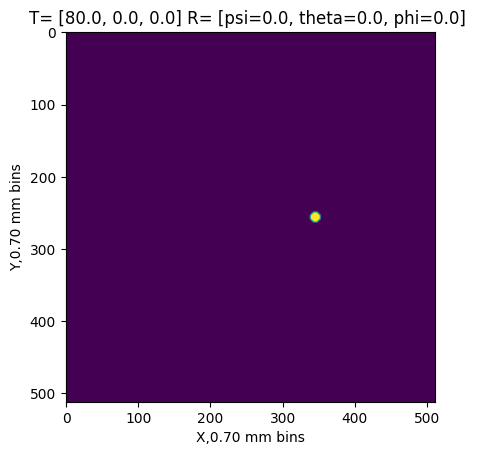

In [24]:
plt.imshow(np.flipud(SumZ))
plt.xlabel(f'X,{spacing[0]:0.2f} mm bins')
plt.ylabel(f'Y,{spacing[1]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [psi={psiDeg:.1f}, ' + f'theta={thetaDeg:.1f}, ' + f'phi={phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

##Make DRRs for PVCvolume

In [25]:
volume=PVCvolume

Get characteristics of volume

In [26]:
ic(volume.dtype)
ic(volume.shape)
ic(volume.size)

ic| volume.dtype: dtype('float32')
ic| volume.shape: (512, 512, 133)
ic| volume.size: 34865152


34865152

Initialize the DRR module for generating synthetic X-rays

In [27]:
device = "cuda" if torch.cuda.is_available() else "cpu"
drr = DRR(
    volume,      # The CT volume as a numpy array
    spacing,     # Voxel dimensions of the CT
    sdr=300.0,   # Source-to-detector radius (half of the source-to-detector distance)
    height=200,  # Height of the DRR (if width is not seperately provided, the generated image is square)
    delx=4.0,    # Pixel spacing (in mm)
).to(device)

Set the camera pose with rotation (yaw, pitch, roll) and translation (x, y, z)

In [28]:
rotation = torch.tensor([[torch.pi, 0.0, torch.pi / 2]], device=device)
translation = torch.tensor([[bx, by, bz]], device=device)

Also note that DiffDRR can take many representations of SO(3) 📸

For example, quaternions, rotation matrix, axis-angle, etc...

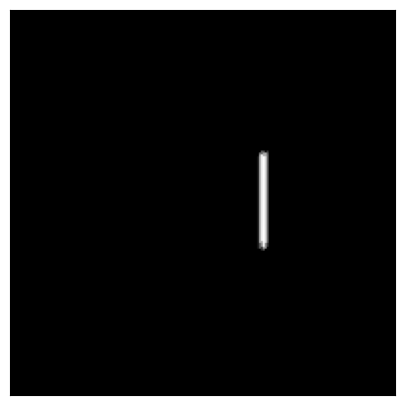

In [29]:
img = drr(rotation, translation, parameterization="euler_angles", convention="ZYX")
plot_drr(img, ticks=False)
plt.show()

Get size of image

In [30]:
ic(img.shape)

ic| img.shape: torch.Size([1, 1, 200, 200])


torch.Size([1, 1, 200, 200])

## DRR Generation

`DiffDRR` is implemented as a custom PyTorch module.

All raytracing operations have been formulated in a vectorized function, enabling use of PyTorch's GPU support and autograd.
This also means that DRR generation is available as a layer in deep learning frameworks.

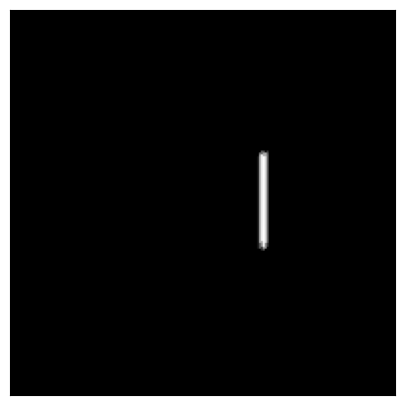

In [31]:
#| cuda
# Read in the volume and get the isocenter
#volume, spacing = load_example_ct()
bx, by, bz = torch.tensor(volume.shape) * torch.tensor(spacing) / 2

# Initialize the DRR module for generating synthetic X-rays
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
drr = DRR(
    volume,  # The CT volume as a numpy array
    spacing,  # Voxel dimensions of the CT
    sdr=300.0,  # Source-to-detector radius (half of the source-to-detector distance)
    height=200,  # Height of the DRR (if width is not seperately provided, the generated image is square)
    delx=4.0,  # Pixel spacing (in mm)
).to(device)

# Set the camera pose with rotations (yaw, pitch, roll) and translations (x, y, z)
rotations = torch.tensor([[torch.pi, 0.0, torch.pi / 2]], device=device)
translations = torch.tensor([[bx, by, bz]], device=device)
img = drr(rotations, translations, parameterization="euler_angles", convention="ZYX")
plot_drr(img, ticks=False)
plt.show()

Install matplotlib and numpy

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cm

!pip install icecream
from icecream import ic

Input from .xlsx file

MDSL.excel80M10RFR.cut-plate.008.150roi.2.30pin.105ellipse.fix

From Google drive

In [33]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/SPECTGeometry/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
!ls -ltr /content/drive/MyDrive/SPECTGeometry/

total 1223
-rw------- 1 root root 461819 Dec 19 14:27 MDSL.excel80M10RFR.cut-plate.007.150roi.2.30pin.105ellipse.fix.xlsx
-rw------- 1 root root 790185 Dec 22 19:19 MDSL.excel80M10RFR.cut-plate.008.150roi.2.30pin.105ellipse.xlsx


Install openpyxl using pip

In [35]:
pip install openpyxl

https://openpyxl.readthedocs.io/en/stable/tutorial.html#loading-from-a-file

In [36]:
from openpyxl import load_workbook
wb = load_workbook(filename = '/content/drive/MyDrive/SPECTGeometry/MDSL.excel80M10RFR.cut-plate.008.150roi.2.30pin.105ellipse.xlsx',data_only=True)

loop through worksheets

In [37]:
for sheet in wb:
...     print(sheet.title)

Main
Coordinates
MDSL cloud import
Theta
Values
Design Table


Go to Coordinates Worksheet

In [38]:
wb.active = 1
print(wb.active.title)
ws = wb.active

Coordinates


Length of Collimator

In [39]:
ic(ws.cell(2,7).value)
lcoll=np.zeros(80)
for i in range(3,83):
  lcoll[i-3]=(ws.cell(i,7).value)

ic| ws.cell(2,7).value: 'length of collimator'


Choose vsdr = 5 * length of collimato

In [40]:
vsdr=5.*lcoll

alpha: Azimuthal angle (radians)

In [41]:
ic(ws.cell(2,22).value)
alpha=np.zeros(80)
for i in range(3,83):
  alpha[i-3]=(ws.cell(i,22).value)

ic| ws.cell(2,22).value: 'pinhole azimuth (radians)'


beta = altitude (radians)

In [42]:
ic(ws.cell(2,23).value)
beta=np.zeros(80)
for i in range(3,83):
  beta[i-3]=(ws.cell(i,23).value)

ic| ws.cell(2,23).value: 'pinhole elevation (radians)'


DRR Generation

DiffDRR is implemented as a custom PyTorch module.

All raytracing operations have been formulated in a vectorized function, enabling use of PyTorch's GPU support and autograd. This also means that DRR generation is available as a layer in deep learning frameworks.

Display Wide FOV for camera [0]

ic| bx0.dtype: torch.float32
ic| bx.dtype: torch.float32
ic| rotations0: tensor([[3.1416, 0.0000, 1.5708]], device='cuda:0')
ic| rotations0.dtype: torch.float32
ic| rotations: tensor([[ 0.2488, -0.2403,  1.5708]], device='cuda:0')
ic| rotations.dtype: torch.float32
ic| img.shape: torch.Size([1, 1, 250, 250])
ic| imgMax: tensor(10.5385, device='cuda:0')


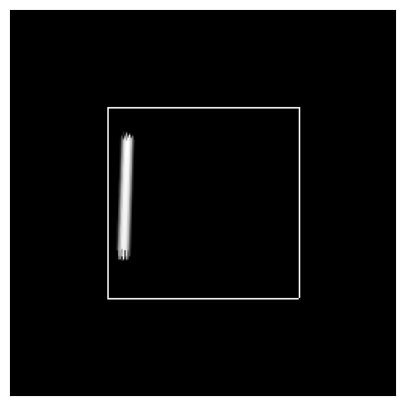

In [43]:
#| cuda
# Read in the volume and get the isocenter
#volume, spacing = load_example_ct()
bx0, by0, bz0 = torch.tensor(volume.shape) * torch.tensor(spacing) / 2
ic(bx0.dtype)
bx, by, bz = torch.tensor(volume.shape) * torch.tensor(spacing) / 2
ic(bx.dtype)
# Initialize the DRR module for generating synthetic X-rays
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
drr = DRR(
    volume,  # The CT volume as a numpy array
    spacing,  # Voxel dimensions of the CT
    sdr=float(vsdr[0]),  # Source-to-detector radius (half of the source-to-detector distance)
    height=250,  # Height of the DRR (if width is not seperately provided, the generated image is square)
    delx=2.50,  # Pixel spacing (in mm)
).to(device)

# Set the camera pose with rotations (yaw, pitch, roll) and translations (x, y, z)
rotations0 = torch.tensor([[torch.pi, 0.0, torch.pi / 2]], device=device)
ic(rotations0)
ic(rotations0.dtype)
rotations = torch.tensor([[float(alpha[0]), float(beta[0]), torch.pi / 2]], device=device)
ic(rotations)
ic(rotations.dtype)
translations0 = torch.tensor([[bx0, by0, bz0]], device=device)
translations = torch.tensor([[bx, by, bz]], device=device)
#img = drr0(rotations0, translations0, parameterization="euler_angles", convention="ZYX")
img = drr(rotations, translations, parameterization="euler_angles", convention="ZYX")
ic(img.shape)
imgMax=img.max()
img[0,0,63:187,63] = imgMax
img[0,0,63:187,187] = imgMax
img[0,0,63,63:187] = imgMax
img[0,0,187,63:187] = imgMax
ic(imgMax)
plot_drr(img, ticks=False)
plt.show()

Adapted from diffdrr/visualization.py/plot_drr

Display Wide FOV for camera [10]

ic| rotations: tensor([[ 2.6307, -0.3508,  1.5708]], device='cuda:0')
ic| rotations.dtype: torch.float32
ic| img.shape: torch.Size([1, 1, 250, 250])
ic| imgMax: tensor(11.1524, device='cuda:0')


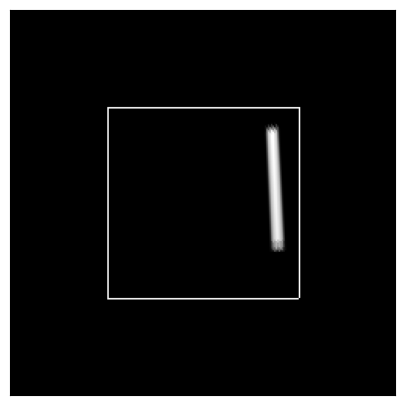

In [44]:
rotations = torch.tensor([[float(alpha[10]), float(beta[10]), torch.pi / 2]], device=device)
ic(rotations)
ic(rotations.dtype)
translations0 = torch.tensor([[bx0, by0, bz0]], device=device)
translations = torch.tensor([[bx, by, bz]], device=device)
#img = drr0(rotations0, translations0, parameterization="euler_angles", convention="ZYX")
img = drr(rotations, translations, parameterization="euler_angles", convention="ZYX")
ic(img.shape)
imgMax=img.max()
img[0,0,63:187,63] = imgMax
img[0,0,63:187,187] = imgMax
img[0,0,63,63:187] = imgMax
img[0,0,187,63:187] = imgMax
ic(imgMax)
plot_drr(img, ticks=False)
plt.show()

Display Wide FOV Series for cameras [0:19]

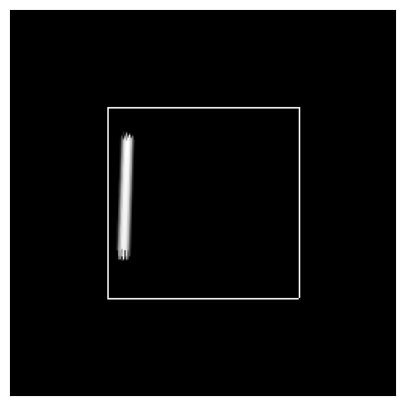

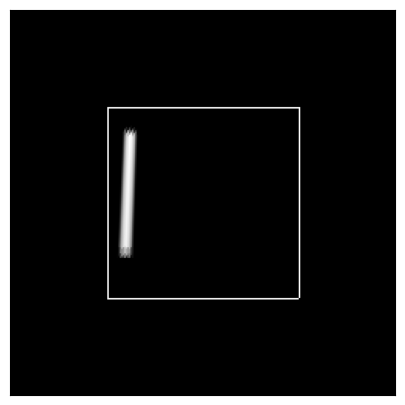

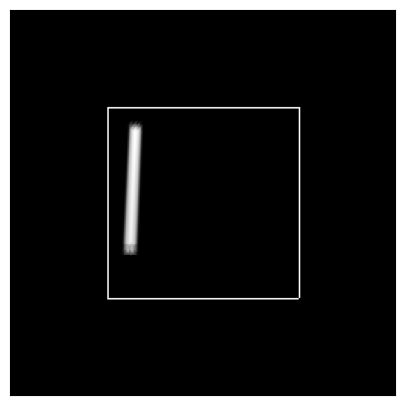

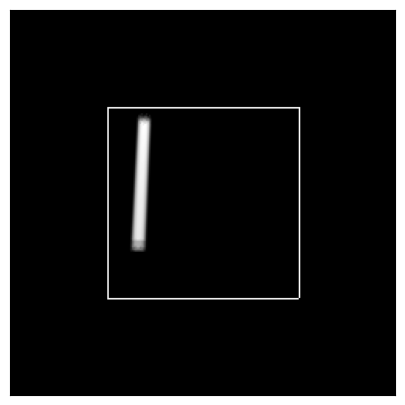

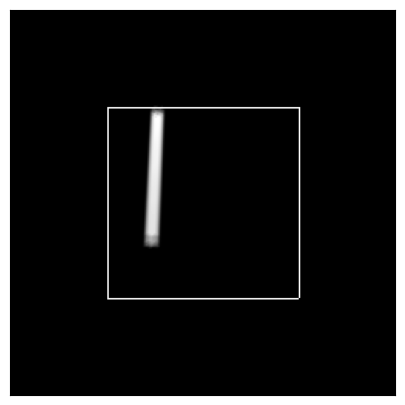

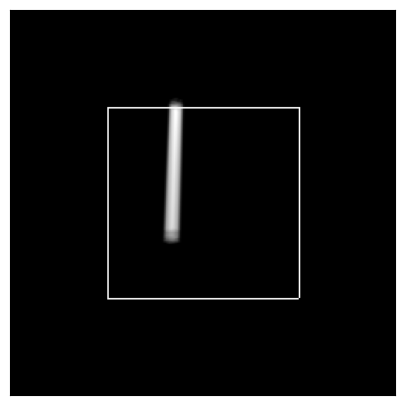

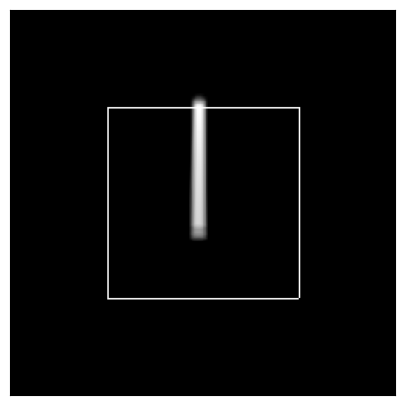

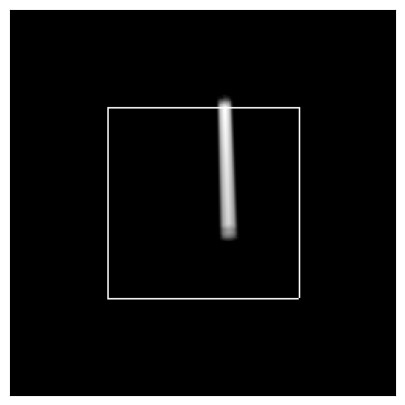

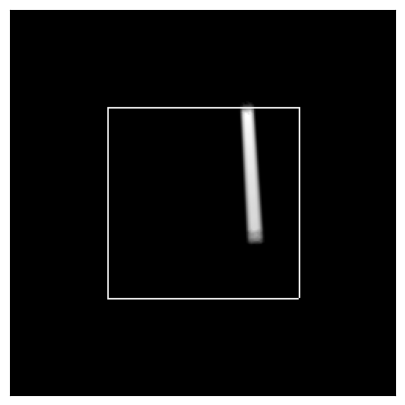

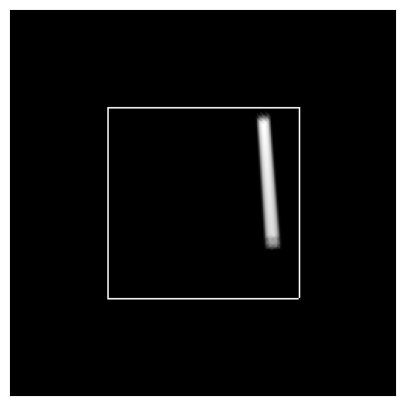

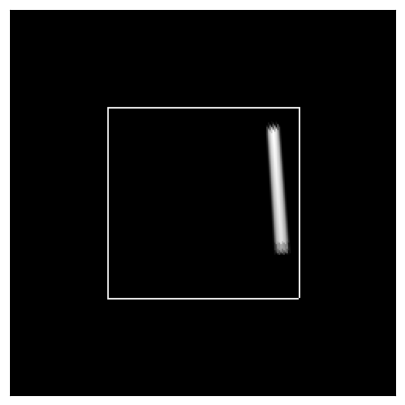

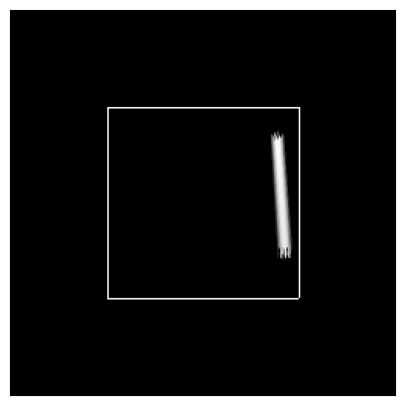

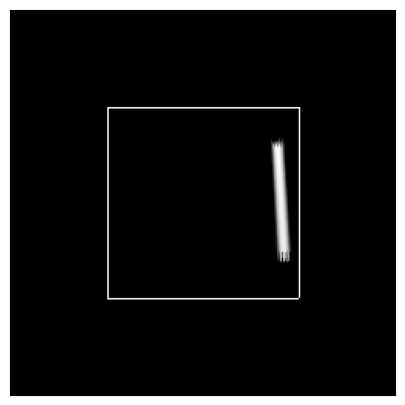

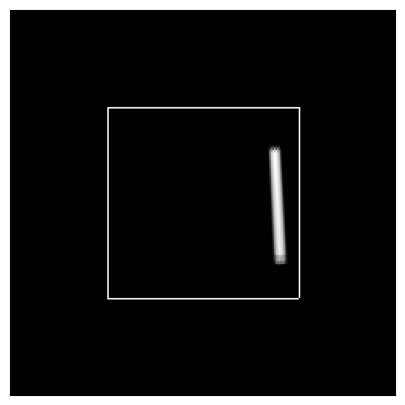

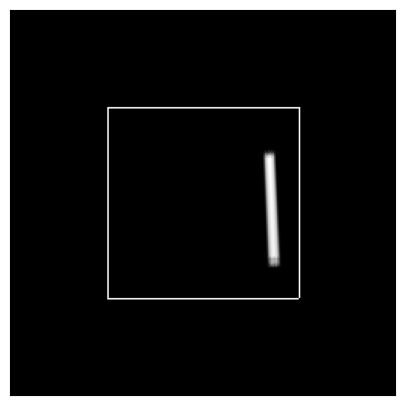

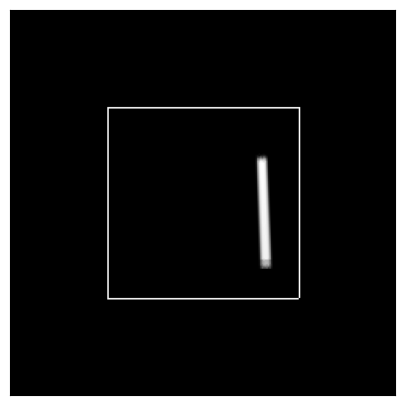

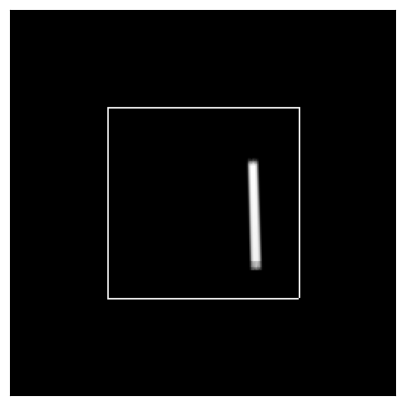

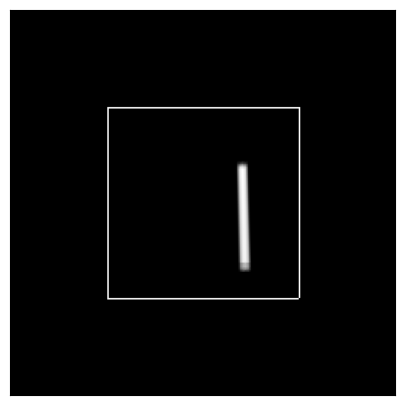

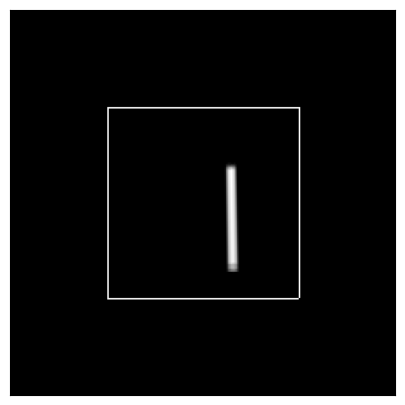

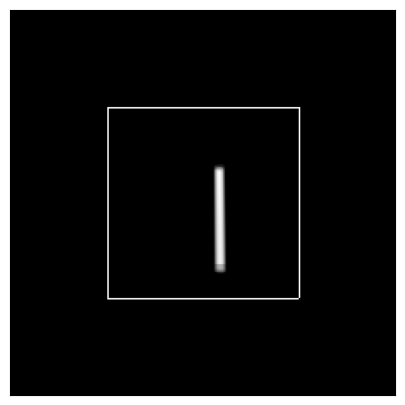

ic| img.shape: torch.Size([1, 1, 250, 250])


torch.Size([1, 1, 250, 250])

In [45]:
#Collect Pseudosinogram for central Z slice

Sinogram0=np.zeros([250,20])

for imod in range(0,20):
  drr = DRR(
    volume,  # The CT volume as a numpy array
    spacing,  # Voxel dimensions of the CT
    sdr=float(vsdr[imod]),  # Source-to-detector radius (half of the source-to-detector distance)
    height=250,  # Height of the DRR (if width is not seperately provided, the generated image is square)
    delx=2.50,  # Pixel spacing (in mm)
  ).to(device)

  # Set the camera pose with rotations (yaw, pitch, roll) and translations (x, y, z)
  rotations = torch.tensor([[float(alpha[imod]), float(beta[imod]), torch.pi / 2]], device=device)
  translations = torch.tensor([[bx, by, bz]], device=device)
  img = drr(rotations, translations, parameterization="euler_angles", convention="ZYX")

  Sinogram0[:,imod]=img[0,0,125,:].cpu()

  imgMax=img.max()
  img[0,0,63:187,63] = imgMax
  img[0,0,63:187,187] = imgMax
  img[0,0,63,63:187] = imgMax
  img[0,0,187,63:187] = imgMax
  plot_drr(img, ticks=False)
  plt.show()

ic(img.shape)

Display Pseudosinogram for central Z slice

In [46]:
Sinogram0=Sinogram0
InterpSinogram0=np.zeros([250,250])

for imod in range(0,19):
  for iInterp in range(0,12):
    iIndexIn=imod
    iIndexOut=(imod*12)+iInterp
    fFrac=float(iInterp)/12.
    #print(f'imod=,{imod},iInterp={iInterp},fFrac={fFrac}')
    InterpSinogram0[:,iIndexOut]=((1.-fFrac)*Sinogram0[:,iIndexIn])+(fFrac*Sinogram0[:,iIndexIn+1])

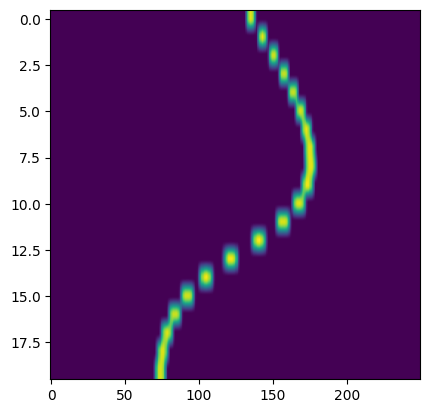

In [47]:
ThisAspect=250./20.
plt.imshow(np.flipud(Sinogram0.T),aspect=ThisAspect)

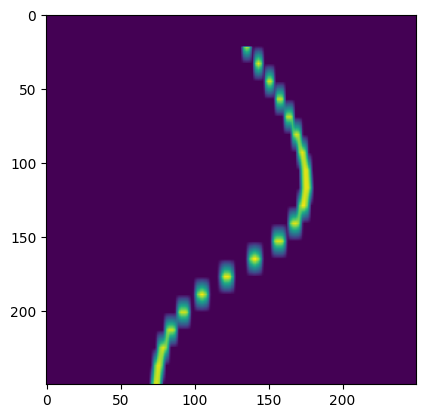

In [48]:
plt.imshow(np.flipud(InterpSinogram0.T))

Compact Wide FOV Display for all 80 modules

/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:836: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
ic| BigImage.shape: torch.Size([4, 250, 20, 250])
ic| BigImage.shape: torch.Size([4, 250, 20, 250])
ic| BigImage.shape: torch.Size([1, 1, 1000, 5000])


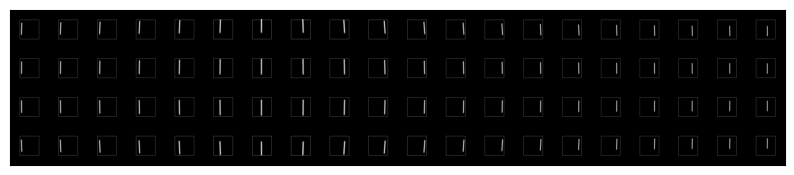

ic| img.shape: torch.Size([1, 1, 250, 250])


torch.Size([1, 1, 250, 250])

In [49]:
#BigImage=torch.zeros(4,250,20,250)
BigImage=img.tile(4,20).resize(4,250,20,250)
ic(BigImage.shape)

#for iRow in range(0,4):
#  for iCol in range(0,20):
for iRow in range(0,4):
  for iCol in range(0,20):
    imod=iRow*20+iCol

    drr = DRR(
        volume,  # The CT volume as a numpy array
        spacing,  # Voxel dimensions of the CT
        sdr=float(vsdr[imod]),  # Source-to-detector radius (half of the source-to-detector distance)
        height=250,  # Height of the DRR (if width is not seperately provided, the generated image is square)
        delx=2.50,  # Pixel spacing (in mm)
          ).to(device)

    # Set the camera pose with rotations (yaw, pitch, roll) and translations (x, y, z)
    rotations = torch.tensor([[float(alpha[imod]), float(beta[imod]), torch.pi / 2]], device=device)
    translations = torch.tensor([[bx, by, bz]], device=device)
    img = drr(rotations, translations, parameterization="euler_angles", convention="ZYX")
    imgMax=img.max()
    img[0,0,63:187,63] = imgMax
    img[0,0,63:187,187] = imgMax
    img[0,0,63,63:187] = imgMax
    img[0,0,187,63:187] = imgMax
    BigImage[iRow,:,iCol,:]=img[0,0,:,:]

ic(BigImage.shape)
BigImage=BigImage.reshape(1,1,1000,5000)
ic(BigImage.shape)
plot_drr(BigImage, ticks=False)
plt.show()

ic(img.shape)

Display FOV Series for cameras [0:19]

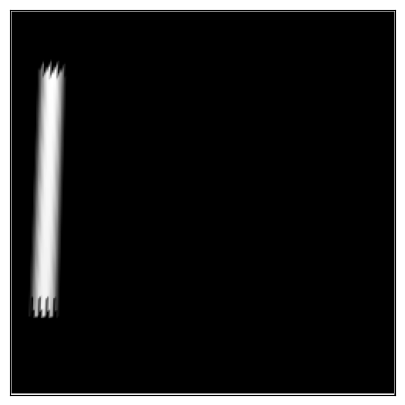

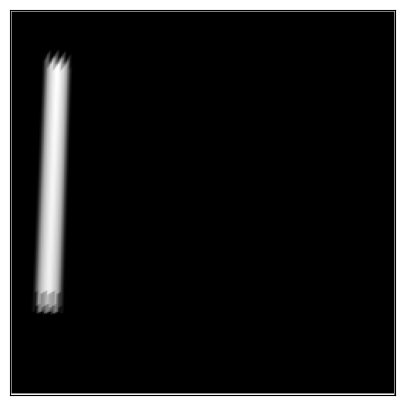

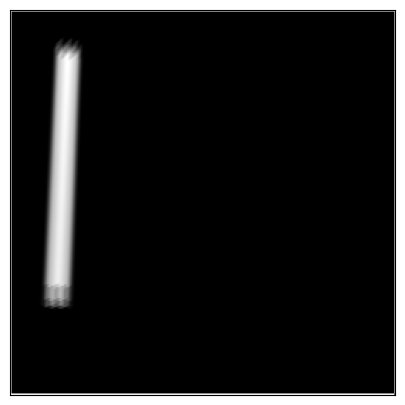

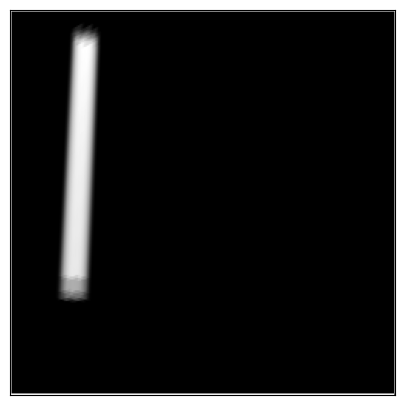

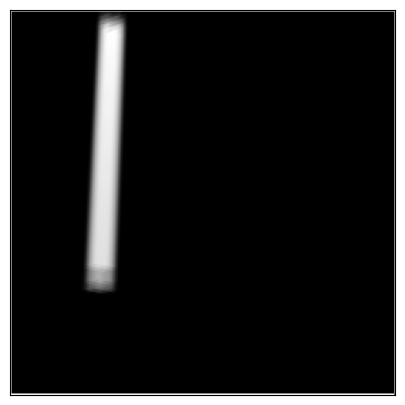

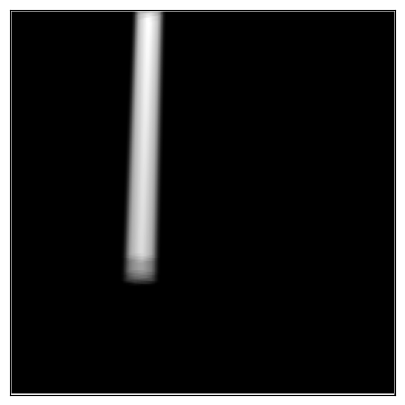

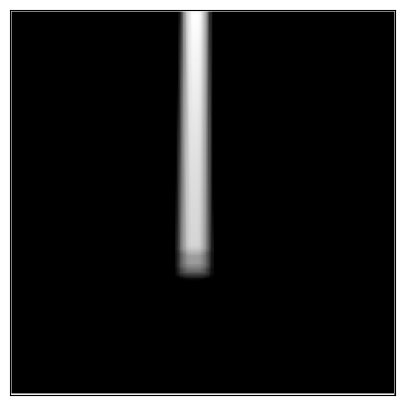

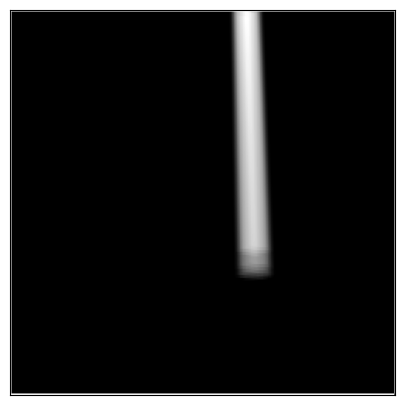

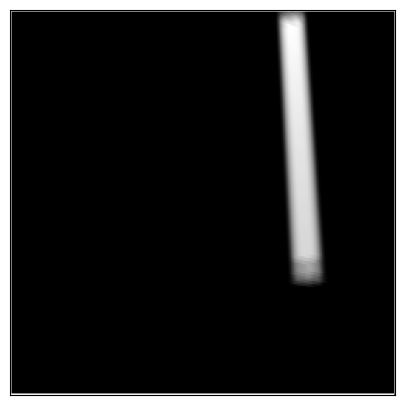

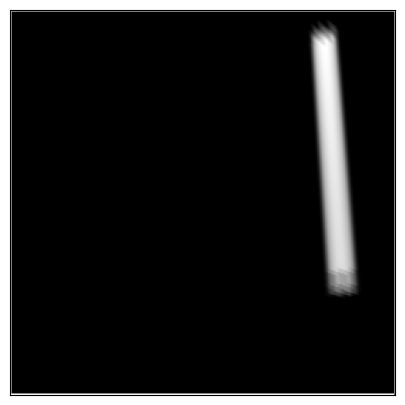

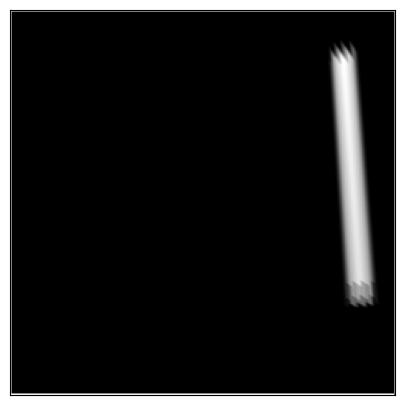

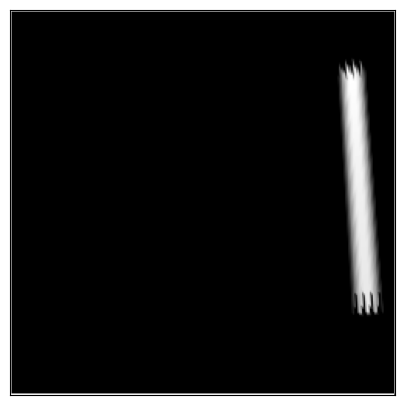

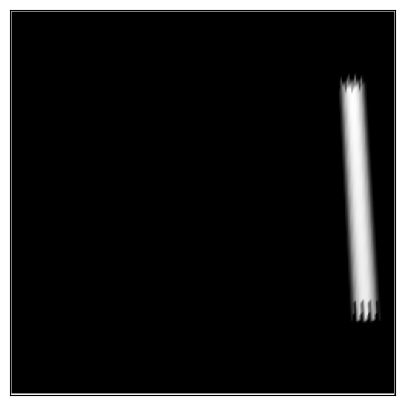

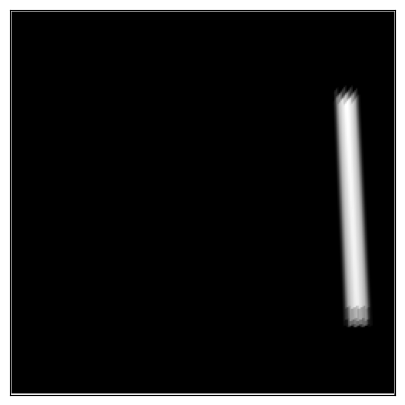

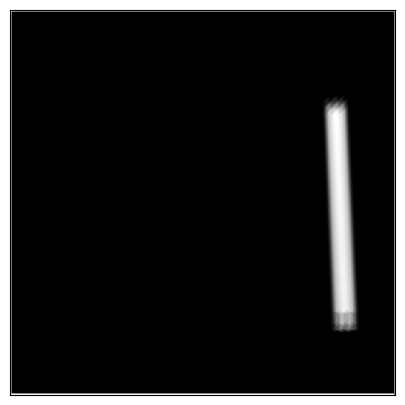

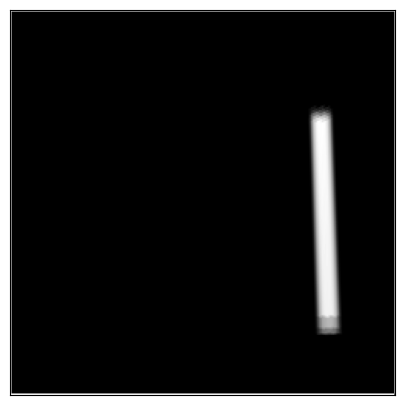

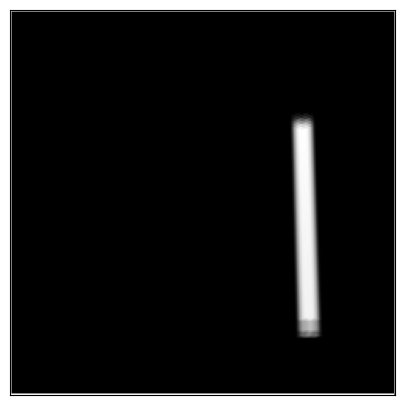

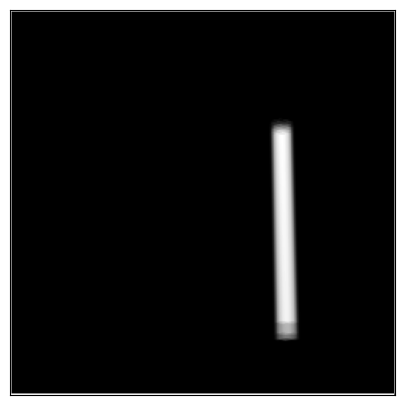

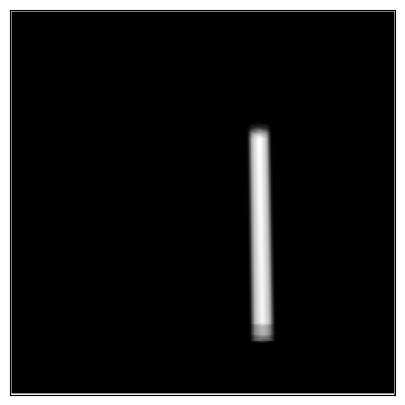

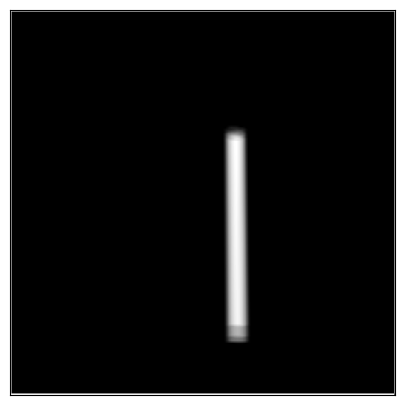

ic| img.shape: torch.Size([1, 1, 250, 250])


torch.Size([1, 1, 250, 250])

In [50]:
for imod in range(0,20):
  drr = DRR(
    volume,  # The CT volume as a numpy array
    spacing,  # Voxel dimensions of the CT
    sdr=float(vsdr[imod]),  # Source-to-detector radius (half of the source-to-detector distance)
    height=250,  # Height of the DRR (if width is not seperately provided, the generated image is square)
    delx=1.25,  # Pixel spacing (in mm)
  ).to(device)

  # Set the camera pose with rotations (yaw, pitch, roll) and translations (x, y, z)
  rotations = torch.tensor([[float(alpha[imod]), float(beta[imod]), torch.pi / 2]], device=device)
  translations = torch.tensor([[bx, by, bz]], device=device)
  img = drr(rotations, translations, parameterization="euler_angles", convention="ZYX")
  imgMax=img.max()
  img[0,0,0:249,0] = imgMax
  img[0,0,0:249,249] = imgMax
  img[0,0,0,0:249] = imgMax
  img[0,0,249,0:249] = imgMax
  plot_drr(img, ticks=False)
  plt.show()

ic(img.shape)

Compact FOV Display for all 80 modules

ic| BigImage.shape: torch.Size([4, 250, 20, 250])
ic| BigImage.shape: torch.Size([4, 250, 20, 250])
ic| BigImage.shape: torch.Size([1, 1, 1000, 5000])


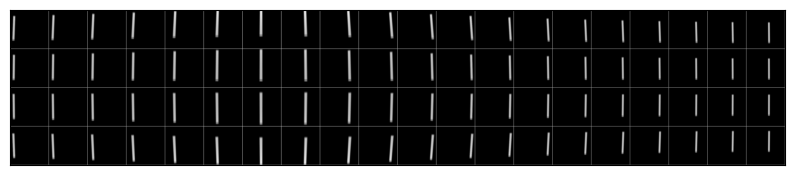

ic| img.shape: torch.Size([1, 1, 250, 250])


torch.Size([1, 1, 250, 250])

In [51]:
#BigImage=torch.zeros(4,250,20,250)
BigImage=img.tile(4,20).resize(4,250,20,250)
ic(BigImage.shape)

#for iRow in range(0,4):
#  for iCol in range(0,20):
for iRow in range(0,4):
  for iCol in range(0,20):
    imod=iRow*20+iCol

    drr = DRR(
        volume,  # The CT volume as a numpy array
        spacing,  # Voxel dimensions of the CT
        sdr=float(vsdr[imod]),  # Source-to-detector radius (half of the source-to-detector distance)
        height=250,  # Height of the DRR (if width is not seperately provided, the generated image is square)
        delx=1.25,  # Pixel spacing (in mm)
          ).to(device)

    # Set the camera pose with rotations (yaw, pitch, roll) and translations (x, y, z)
    rotations = torch.tensor([[float(alpha[imod]), float(beta[imod]), torch.pi / 2]], device=device)
    translations = torch.tensor([[bx, by, bz]], device=device)
    img = drr(rotations, translations, parameterization="euler_angles", convention="ZYX")
    imgMax=img.max()
    img[0,0,0:249,0] = imgMax
    img[0,0,0:249,249] = imgMax
    img[0,0,0,0:249] = imgMax
    img[0,0,249,0:249] = imgMax
    BigImage[iRow,:,iCol,:]=img[0,0,:,:]

ic(BigImage.shape)
BigImage=BigImage.reshape(1,1,1000,5000)
ic(BigImage.shape)
plot_drr(BigImage, ticks=False)
plt.show()

ic(img.shape)